<a href="https://colab.research.google.com/github/Hemanthtak2000/22073706_Project_UoH/blob/main/22073706_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from scipy.stats import randint
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings("ignore")


In [2]:
import pandas as pd
Ins_Details_path = 'https://raw.githubusercontent.com/Hemanthtak2000/22073706_Project_UoH/refs/heads/main/aug_train.csv'
Ins_Details = pd.read_csv(Ins_Details_path)
print(Ins_Details.head())

       id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0  167647    Male   22                1          7.0                   1   
1   17163    Male   42                1         28.0                   0   
2   32023  Female   66                1         33.0                   0   
3   87447  Female   22                1         33.0                   0   
4  501933    Male   28                1         46.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0    < 1 Year             No          2630.0                 152.0       16   
1    1-2 Year            Yes         43327.0                  26.0      135   
2    1-2 Year            Yes         35841.0                 124.0      253   
3    < 1 Year             No         27645.0                 152.0       69   
4    < 1 Year             No         29023.0                 152.0      211   

   Response  
0         0  
1         0  
2         0  
3         0 

In [3]:
Ins_Details.isna().sum()

,0
id,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Vehicle_Damage,0
Annual_Premium,0
Policy_Sales_Channel,0


In [4]:
Ins_Details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382154 entries, 0 to 382153
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    382154 non-null  int64  
 1   Gender                382154 non-null  object 
 2   Age                   382154 non-null  int64  
 3   Driving_License       382154 non-null  int64  
 4   Region_Code           382154 non-null  float64
 5   Previously_Insured    382154 non-null  int64  
 6   Vehicle_Age           382154 non-null  object 
 7   Vehicle_Damage        382154 non-null  object 
 8   Annual_Premium        382154 non-null  float64
 9   Policy_Sales_Channel  382154 non-null  float64
 10  Vintage               382154 non-null  int64  
 11  Response              382154 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 35.0+ MB


In [5]:
# Identify all numerical features and categorical features

# Numerical Features:
numerical_features = Ins_Details.select_dtypes(exclude=['object']).columns.tolist()
print('The numerical features in the Insurance Dataset are:')
print(numerical_features)

# Categorical Features:

categorical_features = Ins_Details.select_dtypes(include=['object']).columns.tolist()
print('\nThe Categorical features in the Insurance Dataset are:')
print(categorical_features)

The numerical features in the Insurance Dataset are:
['id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response']

The Categorical features in the Insurance Dataset are:
['Gender', 'Vehicle_Age', 'Vehicle_Damage']


In [6]:
from sklearn.preprocessing import LabelEncoder

# make an instance of Label Encoder
label_encoder = LabelEncoder()

# transform 'Gender' from Object to Numeric using fit_transform
Ins_Details['Gender'] = label_encoder.fit_transform(Ins_Details['Gender'])

# transform 'Vehicle_Age' from Object to Numeric using fit_transform
Ins_Details['Vehicle_Age'] = label_encoder.fit_transform(Ins_Details['Vehicle_Age'])

# transform 'Vehicle_Damage' from Object to Numeric using fit_transform
Ins_Details['Vehicle_Damage'] = label_encoder.fit_transform(Ins_Details['Vehicle_Damage'])

# Let's look at the top 10 rows to see how the transformation helped
Ins_Details.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,1,22,1,7.0,1,1,0,2630.0,152.0,16,0
1,17163,1,42,1,28.0,0,0,1,43327.0,26.0,135,0
2,32023,0,66,1,33.0,0,0,1,35841.0,124.0,253,0
3,87447,0,22,1,33.0,0,1,0,27645.0,152.0,69,0
4,501933,1,28,1,46.0,1,1,0,29023.0,152.0,211,0


In [7]:
Ins_Details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382154 entries, 0 to 382153
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    382154 non-null  int64  
 1   Gender                382154 non-null  int64  
 2   Age                   382154 non-null  int64  
 3   Driving_License       382154 non-null  int64  
 4   Region_Code           382154 non-null  float64
 5   Previously_Insured    382154 non-null  int64  
 6   Vehicle_Age           382154 non-null  int64  
 7   Vehicle_Damage        382154 non-null  int64  
 8   Annual_Premium        382154 non-null  float64
 9   Policy_Sales_Channel  382154 non-null  float64
 10  Vintage               382154 non-null  int64  
 11  Response              382154 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 35.0 MB


In [8]:
# Check for duplicates
Dup_Ins_Dtls = Ins_Details.duplicated()

# Display the number of duplicate rows
Total_Ins_Dup = Dup_Ins_Dtls.sum()
print(f'Number of duplicate rows: {Total_Ins_Dup}')

Number of duplicate rows: 0


In [9]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Check for outliers in the 'Annual_Premium' column
Out_Det_Ann_Pre = detect_outliers_iqr(Ins_Details, 'Annual_Premium')

# Display the number of outliers and the outlier rows
Count_Outliers = Out_Det_Ann_Pre.shape[0]
print(f'Number of outliers in Annual_Premium: {Count_Outliers}')
print(Out_Det_Ann_Pre)


Number of outliers in Annual_Premium: 10407
            id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
10       31460       1   25                1          8.0                   1   
45      373877       0   58                1         28.0                   0   
49      303609       1   22                1          8.0                   0   
50       54431       0   48                1         28.0                   0   
101     395073       0   65                1         28.0                   1   
...        ...     ...  ...              ...          ...                 ...   
382075  461373       1   47                1         28.0                   0   
382089  241754       0   66                1         28.0                   0   
382106  143075       0   46                1          8.0                   0   
382120  201301       0   48                1          8.0                   1   
382150  247064       1   27                1         28.0        

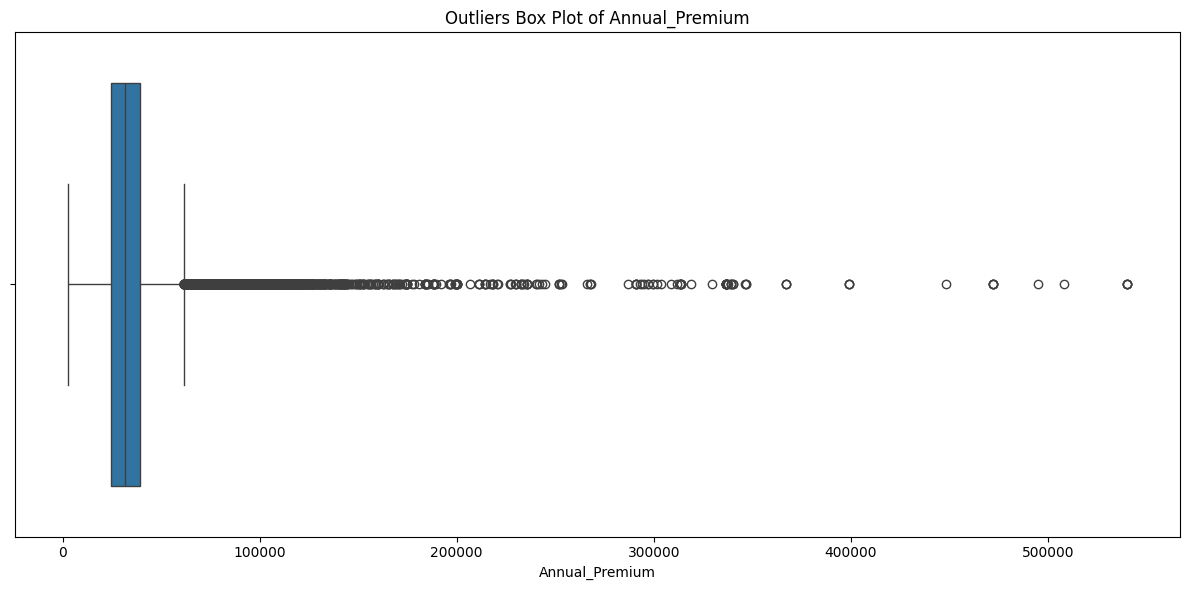

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x=Ins_Details['Annual_Premium'])
plt.title('Outliers Box Plot of Annual_Premium')
plt.tight_layout()
plt.show()


In [11]:
# Calculate the IQR bounds
Q1 = Ins_Details['Annual_Premium'].quantile(0.25)
Q3 = Ins_Details['Annual_Premium'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to keep only values within the bounds
Ins_Details_PP_OL = Ins_Details[(Ins_Details['Annual_Premium'] >= lower_bound) & (Ins_Details['Annual_Premium'] <= upper_bound)]

# Display the new DataFrame shape after outlier removal
print(f'Original DataFrame shape: {Ins_Details.shape}')
print(f'DataFrame shape after outlier removal: {Ins_Details_PP_OL.shape}')


Original DataFrame shape: (382154, 12)
DataFrame shape after outlier removal: (371747, 12)


In [12]:
from sklearn.preprocessing import StandardScaler

# List of numerical columns to scale
num_cols = ['Annual_Premium']  # Replace/add other numerical columns if needed

# Ensure the DataFrame is a proper copy to avoid SettingWithCopyWarning
Ins_Details_PP_OL = Ins_Details_PP_OL[(Ins_Details_PP_OL['Annual_Premium'] >= lower_bound) &
                                   (Ins_Details_PP_OL['Annual_Premium'] <= upper_bound)].copy()

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling using .loc[] to avoid warnings
Ins_Details_PP_OL.loc[:, num_cols] = scaler.fit_transform(Ins_Details_PP_OL[num_cols])

# Verify scaling
print(Ins_Details_PP_OL[num_cols].head())


   Annual_Premium
0       -1.832904
1        0.952118
2        0.439828
3       -0.121050
4       -0.026749


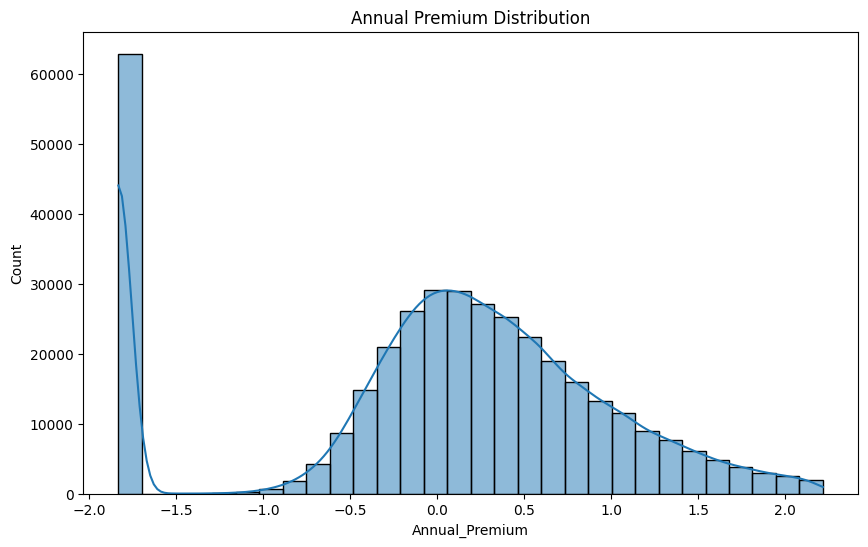

In [13]:
# Annual Premium Distribution after Outliers removal and scaling
plt.figure(figsize=(10, 6))
sns.histplot(Ins_Details_PP_OL['Annual_Premium'], kde=True, bins=30)
plt.title('Annual Premium Distribution')
plt.show()

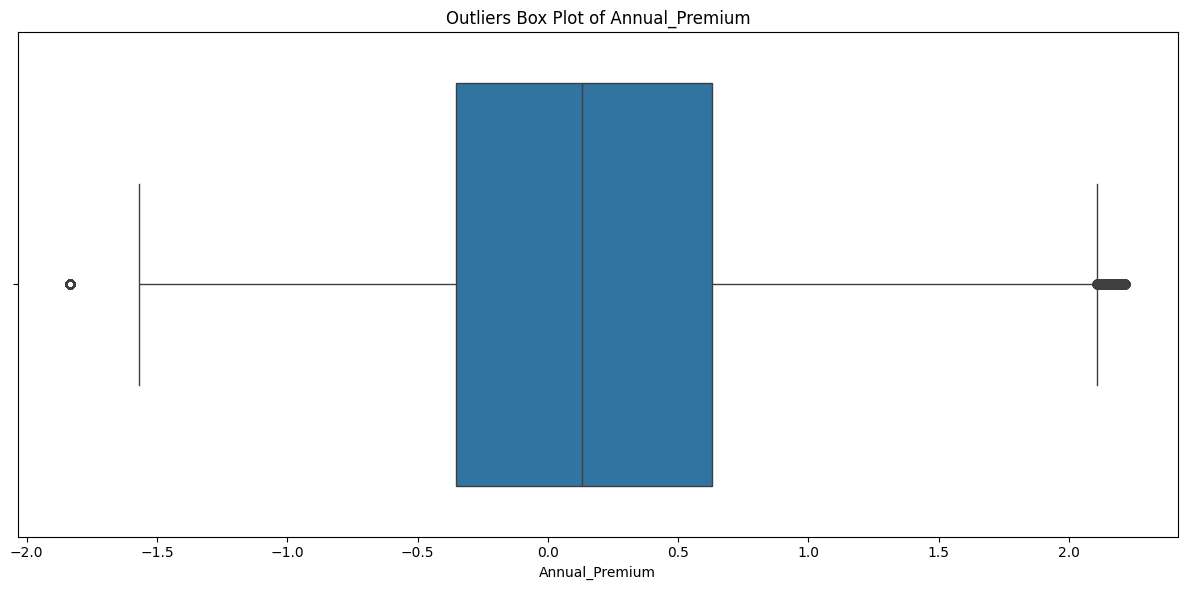

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x=Ins_Details_PP_OL['Annual_Premium'])
plt.title('Outliers Box Plot of Annual_Premium')
plt.tight_layout()
plt.show()


In [15]:
class_counts = Ins_Details_PP_OL['Response'].value_counts()
print(class_counts)

Response
0    311222
1     60525
Name: count, dtype: int64


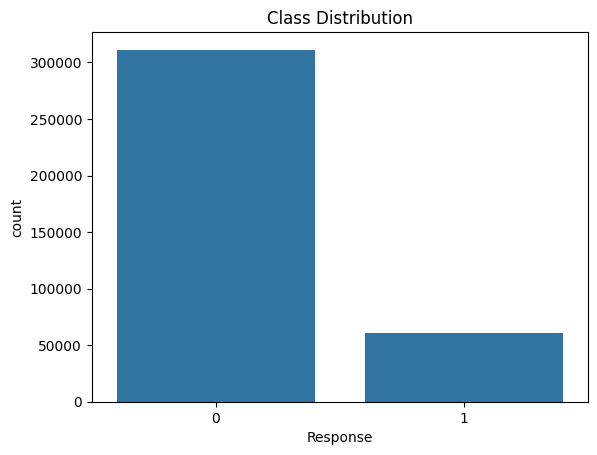

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Response', data=Ins_Details_PP_OL)
plt.title('Class Distribution')
plt.show()

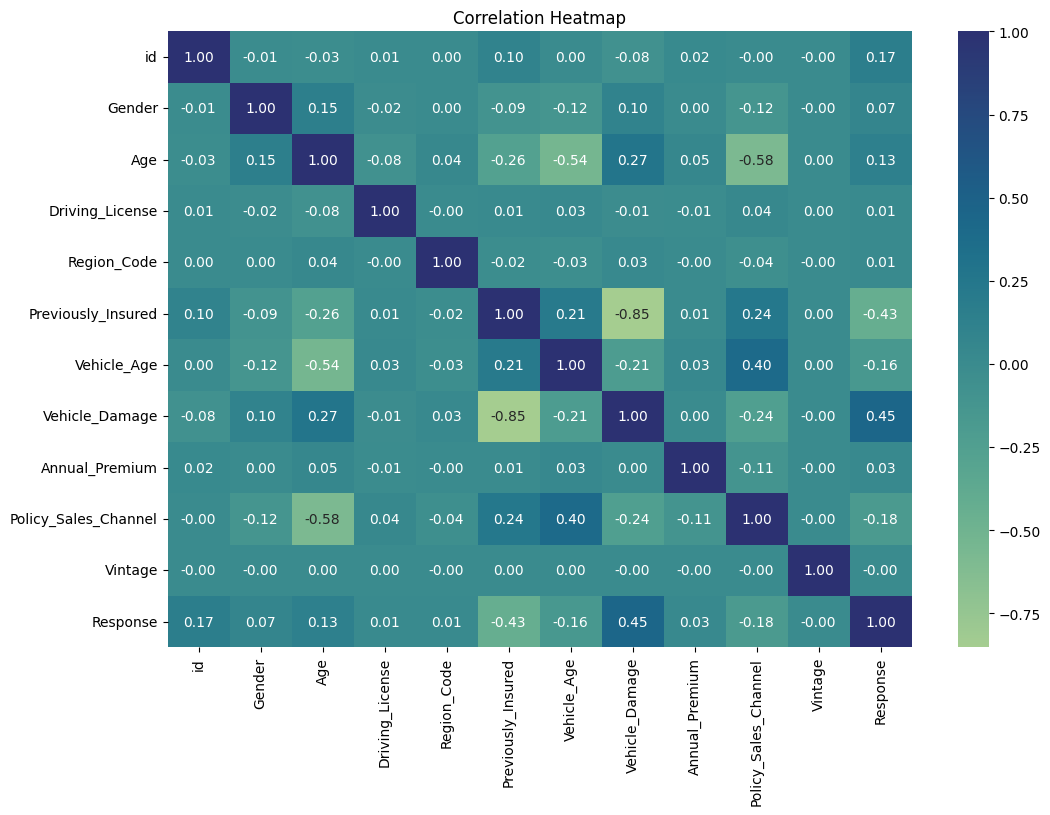

In [17]:
# Correlation Matrix (for numerical features in Ins_Details_PP_OL)
correlation_matrix = Ins_Details_PP_OL.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


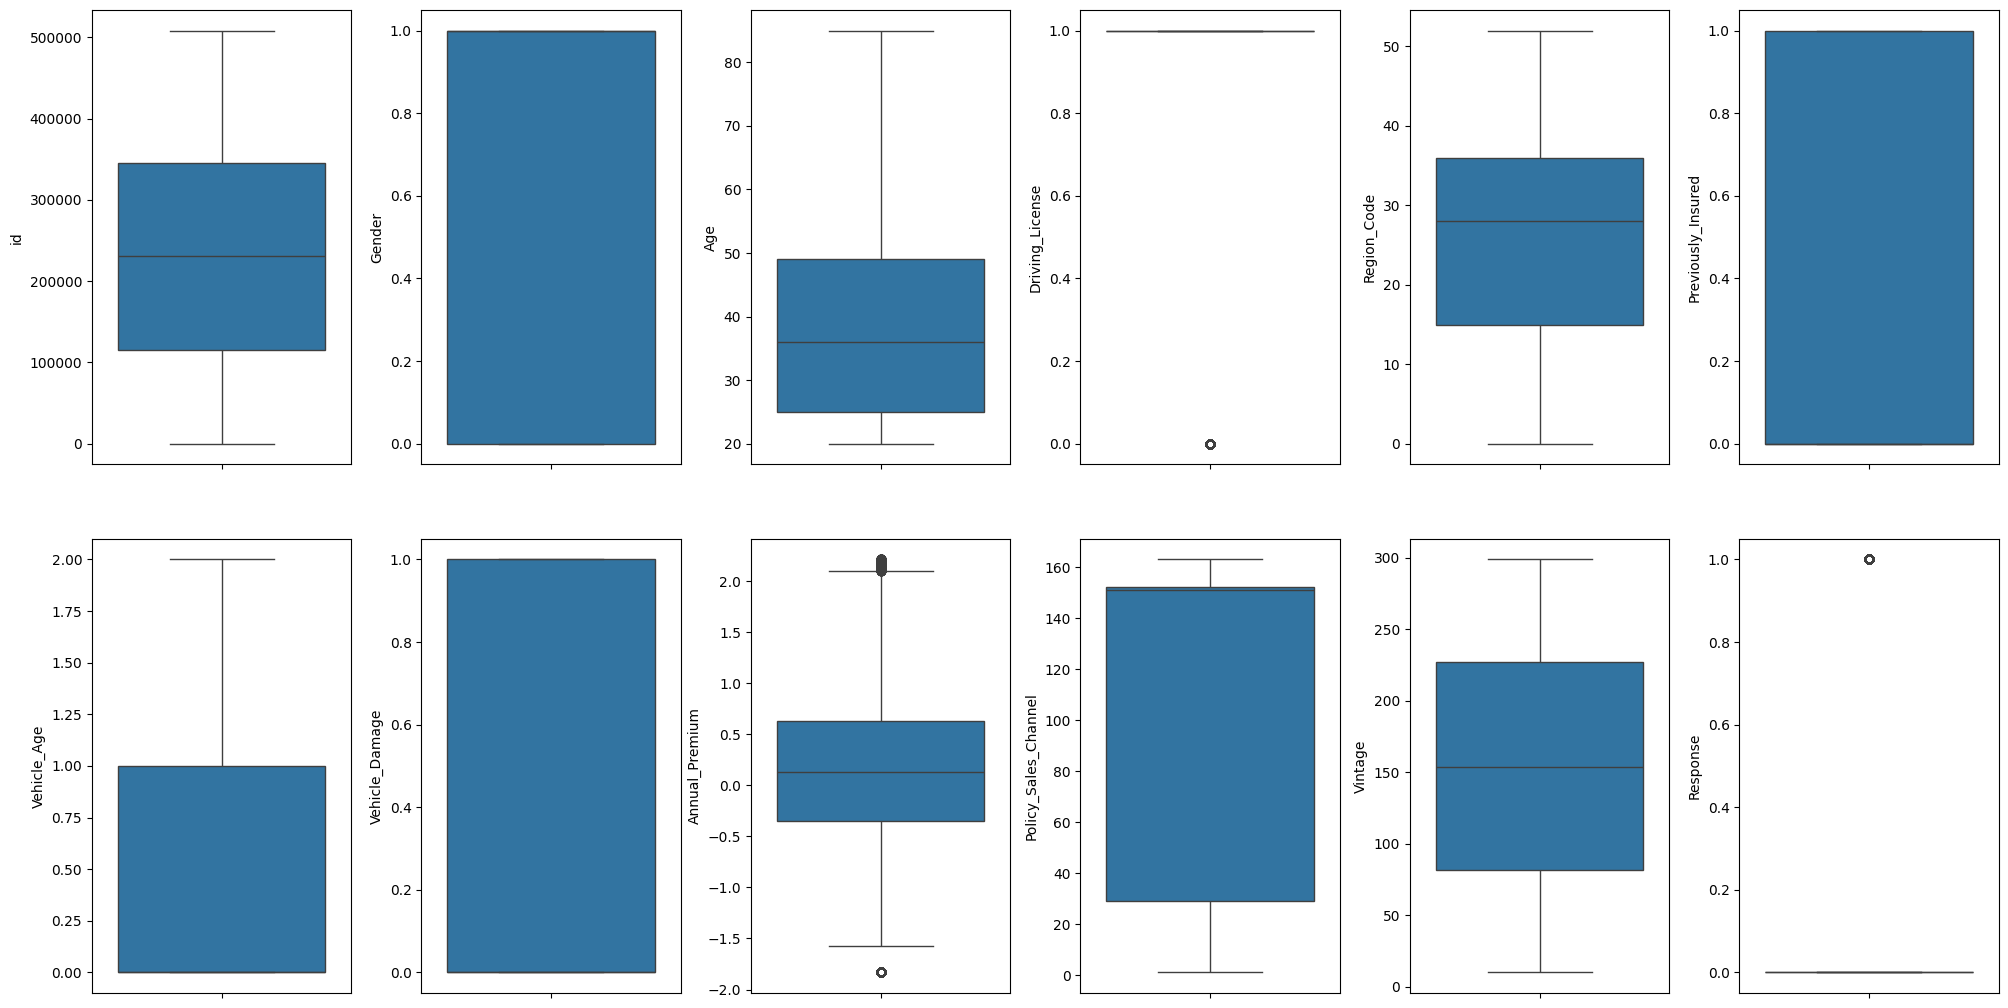

In [18]:
fig, axs = plt.subplots(ncols=6, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()

for k, v in Ins_Details_PP_OL.items():
    sns.boxplot(y=k, data=Ins_Details_PP_OL, ax=axs[index])
    index += 1

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


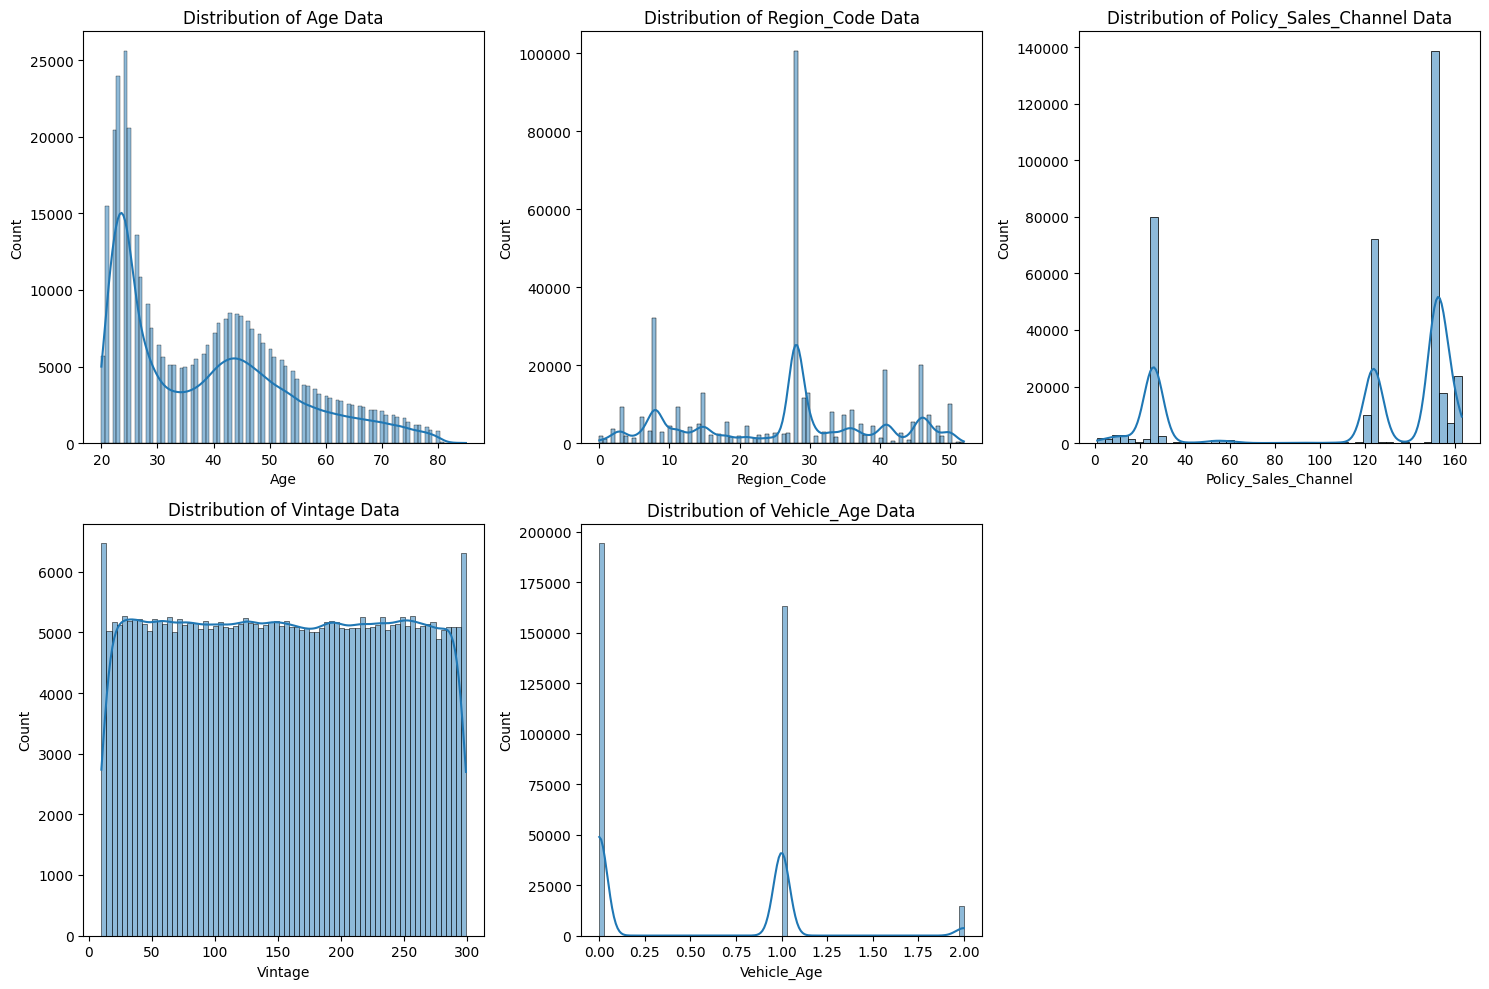

In [19]:
col_list = ['Age', 'Region_Code', 'Policy_Sales_Channel',
            'Vintage','Vehicle_Age']

plt.figure(figsize=(15,10))
for i,col in enumerate(col_list,1):
    plt.subplot(2,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(Ins_Details_PP_OL[col],kde=True)
    plt.tight_layout()
    plt.plot()

In [20]:
# Numerical Features:
X = Ins_Details_PP_OL.drop(['Response'], axis=1)

numerical_features = X.select_dtypes(exclude=['object']).columns.tolist()
print('The numerical features in the Insurance Dataset are:')
print(numerical_features)

The numerical features in the Insurance Dataset are:
['id', 'Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']
